In [61]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
saginaw_president = pd.read_csv('./saginaw-president.txt')
saginaw_straight_party = pd.read_csv('./saginaw-straight-party.txt')

In [64]:
saginaw_straight_party['sp_total'] = (
    saginaw_straight_party['dem'] +
    saginaw_straight_party['rep'] +
    saginaw_straight_party['lib'] +
    saginaw_straight_party['ust'] +
    saginaw_straight_party['wcp'] +
    saginaw_straight_party['grn'] +
    saginaw_straight_party['nlp']
)

saginaw_straight_party['percentage_republican'] = saginaw_straight_party['rep'] / saginaw_straight_party['sp_total']

In [65]:
saginaw_president['total_votes'] = (
    saginaw_president['biden'] +
    saginaw_president['trump'] +
    saginaw_president['jorgensen'] +
    saginaw_president['blankenship'] +
    saginaw_president['hawkins'] +
    saginaw_president['de_la_fuente'] +
    saginaw_president['w1']
)

saginaw_president['trump_vote_percentage'] = saginaw_president['trump'] / saginaw_president['total_votes']

In [66]:
straight_republican_percentage = saginaw_straight_party['percentage_republican'].tolist()
trump_relative_performance = (saginaw_president['trump_vote_percentage'] - saginaw_straight_party['percentage_republican']).tolist()

slope_points_x = []
slope_points_y = []

for index, value in enumerate(straight_republican_percentage):
    if value > 0.2:
        slope_points_x.append(value)
        slope_points_y.append(trump_relative_performance[index])  

m, b = np.polyfit(slope_points_x, slope_points_y, 1)
x = np.array(slope_points_x)

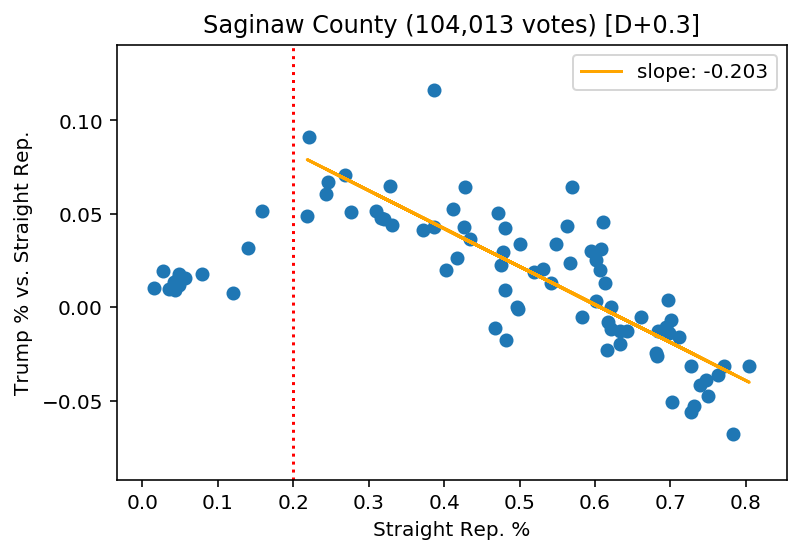

In [70]:
plt.scatter(
    straight_republican_percentage,
    trump_relative_performance
)

plt.xlabel('Straight Rep. %')
plt.ylabel('Trump % vs. Straight Rep.')
plt.axvline(x=0.2, color='red', linestyle='dotted')

plt.plot(x, m*x + b, color='orange', label=f'slope: {round(m, 3)}')
plt.legend(loc=0)

plt.title('Saginaw County (104,013 votes) [D+0.3]')

plt.show()